In [9]:
import sys
sys.path
sys.path.append('C:/Users/Master/OneDrive - 한양대학교/바탕 화면/주예- 대학/전산물리 기말 프로젝트/myModules')
from polyFit import *
from plotPoly import *
from pandas import *
import matplotlib.pyplot as plt

In [10]:
## module polyFit
'''
    c = polyFit(xData,yData,m).
    Returns coefficients of the polynomial
    p(x) = c[0] + c[1]x + c[2]xˆ2 +...+ c[m]xˆm
    that fits the specified data in the least
    squares sense.
    sigma = stdDev(c,xData,yData).
    Computes the std. deviation between p(x)
    and the data.
'''

import numpy as np
import math
from gaussPivot import * 

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]

    return gaussPivot(a,b)

def stdDev(c,xData,yData):
    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
    sigma = math.sqrt(sigma/(n - m))
    return sigma


In [1]:
import pandas as pd

df= pd.read_csv('data.txt', sep='\t')
df.columns=['age','temp_var','CO2','dust']
df


#temp_var는 측정 당시 표면 온도 -55.5도씨를 기준
#측정당시 1999년 CO2 농도: 280ppm, 현재: 대략 400ppm

,age,temp_var,CO2,dust
0,2342,-1.210,284.700000,NaN
1,2374,-1.440,284.303333,NaN
2,2418,-0.730,283.906667,NaN
3,2460,-0.630,283.510000,NaN
4,2501,0.300,283.113333,NaN
...,...,...,...,...
3270,283492,-5.545,213.200000,0.174462
3271,283677,-5.540,213.687500,0.179385
3272,283941,-5.950,214.175000,0.184308
3273,284218,-6.830,214.662500,0.189231


In [12]:
t=df['age']
x=df['temp_var']
y=df['CO2']
z=df['dust']


<AxesSubplot:xlabel='temp_var', ylabel='CO2'>

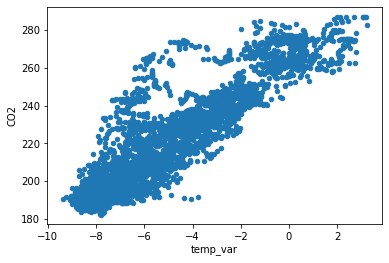

In [13]:
df.plot.scatter(x='temp_var', y='CO2') #CO2농도가 낮을수록 온도가 낮고 높을수록 같이 높아짐


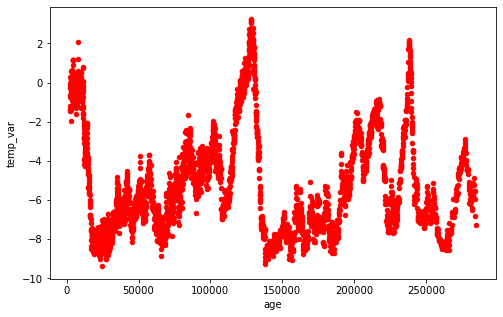

In [24]:
temp_graph=df.plot.scatter(x='age',y='temp_var', color='red', figsize=(8,5))

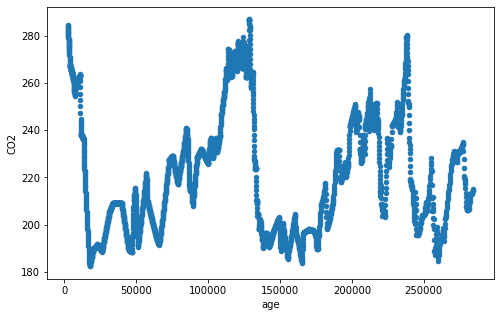

In [25]:
CO2_graph=df.plot.scatter(x='age',y='CO2',figsize=(8,5)) #위 두 그래프가 거의 일치하며 온도변화와 CO2농도의 관계성을 보여줌


<AxesSubplot:>

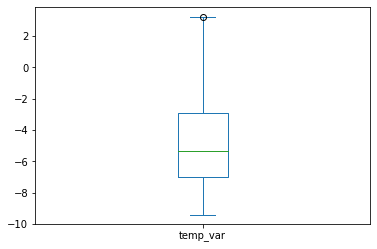

In [3]:
df['temp_var'].plot.box()

<AxesSubplot:>

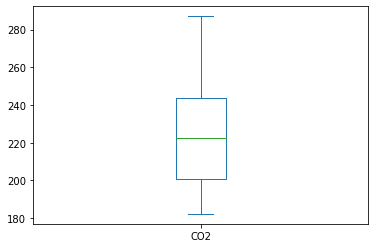

In [7]:
df['CO2'].plot.box()

Coefficients [264.34442415   8.38170009]
Standard Deviation 12.607287547598435


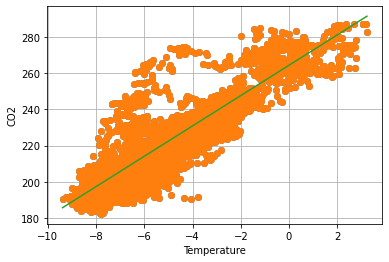

In [16]:
m=1
coeff2=polyFit(x,y,m)
print('Coefficients',coeff2)
print('Standard Deviation',stdDev(coeff2,x,y))
plt.plot(x,y,'o')
plotPoly(x,y,coeff2,xlab='Temperature',ylab='CO2')
plt.show()


#현재 대기중 CO2농도가 400ppm정도이므로 앞으로의 기후 변화를 예측할 수 있다.


In [17]:
df2=df[['temp_var','CO2']]
df2

,temp_var,CO2
0,-1.210,284.700000
1,-1.440,284.303333
2,-0.730,283.906667
3,-0.630,283.510000
4,0.300,283.113333
...,...,...
3270,-5.545,213.200000
3271,-5.540,213.687500
3272,-5.950,214.175000
3273,-6.830,214.662500


<AxesSubplot:xlabel='temp_var', ylabel='CO2'>

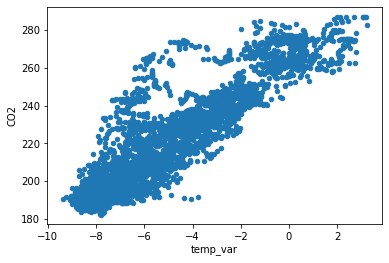

In [31]:
df2.plot.scatter(x='temp_var',y='CO2')

In [19]:
a=coeff2[0]
b=coeff2[1]
y=a+b*2

In [20]:
y

281.1078243439399